# Quantified Self Project

Jonathan Smoley

CPSC222, Fall 2021

Sources: iPhone Screen Time Setting, [Weather API](https://www.visualcrossing.com/)

References: [CPSC222 - U7 Repo](https://github.com/GonzagaCPSC222/U7-Machine-Learning-NLP)

In [1]:
# libraries imported 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Introduction

For this project, the domain is my iPhone. With this domain, I can explore the amount of time I spent out of reality (on my phone) this semester. The iPhone has a setting that tracks the screen time of a given user down to the number of times a user picks up their phone.

While my screen time data was collected manually into a .csv file using MS Excel, I also utilized data from the Visual Crossing REST API for weather data. I had originally planned to make a direct request for data within this report. However, Visual Crossing was in the process of updating their UI so I found it easier to download another .csv from the API webpage. Instead of manually combining both tables into a single dataset, I decided to read in each table individually, combine them into a pandas DataFrame, and then write said DataFrame to a new .csv file that would not be read in again for access. 

This dataset has many more attributes than I plan to use as I recorded virtually everything I could find on my screen time data and the API has no setting to limit the attributes I receive. Thus, I have about 30 attributes including max/min/mean temperatures, weather conditions, app usage times, apps used, notification counts, etc.  

I am attempting to classify how much time I spent on my phone given the temperature and weather conditions for a given day. This classification could result in my taking a step to change my iPhone usage habits. Beyond personal applications, this classification could be used by others iPhone users to find what they need to do to decrease, or even increase, their screen time habits.

In [2]:
# loading data

# read manually collected data
screen_time_df = pd.read_csv('screen_time.csv')

# read data from API (requested in form of csv file)
weather_df = pd.read_csv('weather_data.csv')

## Data Analysis

### Data Cleaning/Preparation

I want to combine the two tables on the date as I requested and collected data for the same range of days during this semester. 

With the weather API date data belonging to an attribute named *Date time*, I cut this back to just *Date* as that is the corresponding attribute name in my screen time table. 

Within this dataset there is a mixture of continuous and categorical data so in order to classify items, label encoding may need to be done. 

Since any case of missing data came from the API source and likely means no data was recorded for that day, I drop columns with a large amount of missing instances and replace any other missing values with 0. 

Finally, I set the index to the date as it is the same for both tables.

In [3]:
# cleaning data

# rename date column to get common attribute names
weather_df.rename(columns = {"Date time": "Date"}, errors = 'raise', inplace = True)

# join tables on the date attribute
dataset_df = weather_df.join(screen_time_df.set_index('Date'), on = 'Date')

# change index to Date column
dataset_df.set_index('Date', inplace = True)

# manage missing values
dataset_df.dropna(how = 'all', axis = 1, inplace = True)
dataset_df.fillna(0, inplace = True)

print(dataset_df.head(5))

                                  Name  Maximum Temperature  \
Date                                                          
10/03/2021  Spokane, WA, United States                 70.8   
10/04/2021  Spokane, WA, United States                 69.6   
10/05/2021  Spokane, WA, United States                 74.1   
10/06/2021  Spokane, WA, United States                 58.1   
10/07/2021  Spokane, WA, United States                 58.3   

            Minimum Temperature  Temperature  Wind Chill  Precipitation  Snow  \
Date                                                                            
10/03/2021                 43.4         55.4        42.3           0.00   0.0   
10/04/2021                 44.1         55.6        42.5           0.00   0.0   
10/05/2021                 47.6         60.6         0.0           0.00   0.0   
10/06/2021                 42.9         50.9        39.3           0.03   0.0   
10/07/2021                 35.5         46.0        34.9           0.00 

### Data Visualization

In the interest of making my data more understandable, I need to visualize a few things. 

First, I want to visualize how to change in outside temperature had an effect on the amount of time I spent on my phone each day. I believe a scatter plot is most fitting for this situation. 

Also, the different apps I tend to use most often need to be looked at so, using a bar chart, I can visualize the most common apps and the number of times I used them this semester. 

Finally, I think visualizing the notification data is beneficial as this data is used in my second Hypothesis Test. I am using a regular plot with date as x and notification count as y because I find it important to show the change in notification count, something a bar chart might not visualize the best.

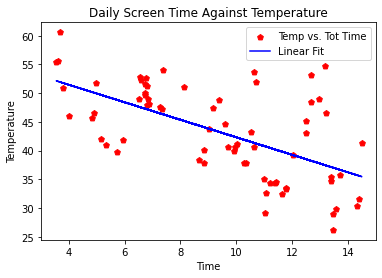

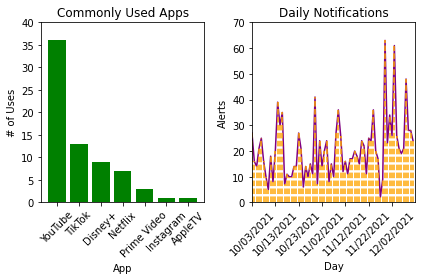

In [4]:
# visualizing data

# total time spent on screen vs. temperature
plt.figure()
plt.scatter(dataset_df['Total Time'].sort_values(), dataset_df['Temperature'], marker = 'p', color = 'r', label = 'Temp vs. Tot Time')
m, b = stats.linregress(dataset_df['Total Time'].sort_values(), dataset_df['Temperature'])[0:2]
plt.plot(dataset_df['Total Time'], m*dataset_df['Total Time'] + b, 'b', label = 'Linear Fit')
plt.title('Daily Screen Time Against Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.xlim(3, 15)
plt.legend()
plt.show()

# daily most used app vs. number of times used
plt.subplot(1, 2, 1)
plt.bar(dataset_df['Most Used App'].value_counts().index, dataset_df['Most Used App'].value_counts(), color = 'green')
plt.title('Commonly Used Apps')
plt.xlabel('App')
plt.ylabel('# of Uses')
plt.ylim(0, 40)
plt.xticks(ticks = np.arange(0, len(dataset_df['Most Used App'].value_counts())), labels = [x for x in dataset_df['Most Used App'].value_counts().index], rotation = 45)

# date vs. number of notifications
plt.subplot(1, 2, 2)
plt.plot(dataset_df.index, dataset_df['App Notifications'], color = 'purple')
plt.vlines(dataset_df.index, 0, dataset_df['App Notifications'], color = 'orange', linestyles = 'dashed')
plt.title('Daily Notifications')
plt.xlabel('Day')
plt.ylabel('Alerts')
plt.xlim(0, 70)
plt.ylim(0, 70)
plt.xticks(np.arange(0, len(dataset_df), 10), rotation = 45)

# subplot organization
plt.tight_layout()
plt.show()

### Hypothesis Testing

As for hypothesis testing, I want to determine my limiting of app notifications at around 35 days of recording data had an effect on the total amount of time I spent on my phone each day. I also want to see if there is a correlation between the first app I used each day and the app with the most notifications (the most activity going on).

On the first day of November, 2021, I went through the apps on my phone to limit the notifications each app sent me. I would like to see  
whether this action changed the average amount of time I spent on my phone daily.
* $H_{o}$ = $\mu_{before}$ >= $\mu_{after}$
* $H_{1}$ = $\mu_{before}$ < $\mu_{after}$ 
* $\alpha$ = 0.1
* df = $n_1$ + $n_2$ - 2 = 35 + 35 - 2 = 68  
* type of t-test: two-sample, one-tailed, dependent
* $t_{critical}$ = 1.2941
* if $t_{computed}$ < 1.2941, then reject $H_{o}$
* if $t_{computed}$ >= 1.2941, then do not reject $H_{1}$

I also want to see if the app first used each day corresponds to the app I got the most notifications for each day.
* $H_{o}$ = $\mu_{first}$ != $\mu_{notified}$
* $H_{1}$ = $\mu_{first}$ == $\mu_{notified}$
* $\alpha$ = 0.1
* df = n - 1 = 70 - 1 = 69
* type of t-test: two-sample, two-tailed, independent
* $t_{critical}$ = +/-1.6672
* if $t_computed$ < -1.6672 or > +1.6672, then reject $H_o$
* if $t_computed$ > -1.6672 or < +1.6672, then do not reject $H_o$

In [5]:
# hypothesis testing on data

before = dataset_df.loc['10/03/2021':'11/06/2021', 'Total Time']
after = dataset_df.loc['11/07/2021':'12/11/2021', 'Total Time']

# t-test
t, p = stats.ttest_rel(after, before)
print('t-computed:', round(t, 4))

# label encoding
coder = LabelEncoder()
first_app = coder.fit_transform(dataset_df['First App'])
most_notified_app = coder.fit_transform(dataset_df['Most Notified App'])

# t-test
t, p = stats.ttest_ind(first_app, most_notified_app)
print('t-computed:', round(t, 4))

t-computed: 0.2288
t-computed: -0.2817


### Hypothesis Test Results:  

My first hypothesis test revealed that limiting the notifications I received from all apps had no effect on the time I spent on my phone.

My second hypothesis test revealed that the first app I used each day correlates to the number of notifications I get each day. That is,  
of course, after having encoded the attributes for first app and most notified app to numeric data I can get a mean for.

## Classification Results:

In classification, I am attempting to predict the historical weather condition for each day based on the numeric attributes as they are (meaning without encoding). 

Given the scatter plot above, I think the conditions may correlate to the decrease in temperature and increase in total screen time.

To compare with a kNN classifier, I will also run a Decision Tree Classification. Thus, a comparison can be made on the accuracy that each produces in classifying a correct condition.

The classification(s) were challenging due to a low number of instances (e.g. the amount of data was small). My data range only spans back to a month into the semester.

In [6]:
# kNN classification

# set X and y, then encode y
conditions = pd.DataFrame(dataset_df.loc[:, 'Conditions'], columns = ['Conditions', 'Encoding'])
cond_coded = coder.fit_transform(conditions.iloc[:, 0])
conditions['Encoding'] = list(cond_coded)

numeric_df = dataset_df.drop(columns = ['Name', 'Conditions', 'Week Day', 'Most Used Category', 'Most Used App',
                                        'First Pickup', 'First App', 'Most Notified App', 'Snow', 'Snow Depth',
                                        'Precipitation', 'Wind Gust', 'Most Used Time'])

# normalize X
scaler = MinMaxScaler()
X = scaler.fit_transform(numeric_df)
y = conditions['Encoding'].values

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 83)

# kNN classifier
k = 4
kNN_clf = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
kNN_clf.fit(X_train, y_train)
y_pred = kNN_clf.predict(X_test)

print('Accuracy of', round(accuracy_score(y_test, y_pred), 4), 'when', k, 'neighbors are used!')

Accuracy of 0.6667 when 4 neighbors are used!


### Another Classification For Comparison

In [7]:
# decision tree classification

# classifier
dec_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)

# train w/ training set
dec_clf.fit(X_train, y_train)

# test w/ testing set
y_predicted = dec_clf.predict(X_test)

# print accuracy
print('Accuracy of', round(accuracy_score(y_test, y_predicted), 4))

Accuracy of 0.6111


## Conclusion

For this project I utilized the screen time data on my phone and some weather data from Visual Crossing's Historical Weather API. In the end, I referenced the temperature attributes, time attributes, and wind-related attributes to determine what the weather condition was for each day.

As a result of classification, I found that, generally, there is some correlation between the conditions (or weather) outside and the amount of time I spend on my phone. This was determined through the various data classifications that were performed above and resulted in >60% accuracy in determining outdoor weather conditions. Again, the most challenging part about performing these classifications was the amount of data as it was limited to 10 weeks of the Fall 2021 semester. Thus, if I wanted to improve performance I should continue adding daily screen time data. However, another useful action could be to find a more reliable weather API as this one caused some problems in the grand scope of things. 

For the iPhone users that can be viewed as stakeholders in this project, this project can help point out habits like staying indoors when the weather changed. Or, hopefully, it can be used to decrease the hours one spends on their phone by determining the times when one should put into practice a plan to get off their phone. 